In [83]:
import pandas as pd
from IPython.display import display

dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv")

# dataset.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\Kaggle\Profit Prediction using Python\dataset\Startups.csv", index=None, header=True)
# dataset.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Python\Kaggle\Profit Prediction using Python\dataset\Startups.xlsx", index=None, header=True)

print("Shape of dataset = %d Baris & %d Kolom"%dataset.shape)
print("Informasi dataset : ")
print(dataset.info())
print("Cek Missing Value : ")
display(dataset.isnull().sum())
display(dataset.head())

Shape of dataset = 50 Baris & 5 Kolom
Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
Cek Missing Value : 


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Statistik dasar dataset : ")
statistik_dasar = dataset.describe()
display(statistik_dasar)

Statistik dasar dataset : 


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Correlation of feature & Label


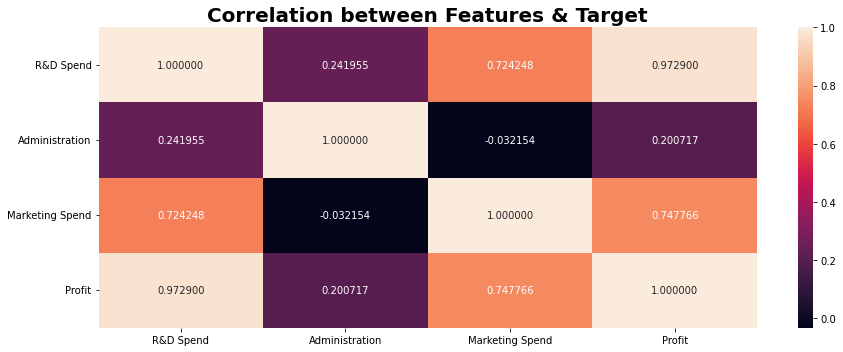

In [85]:
print("Correlation of feature & Label")

dataset_corr = dataset.corr()
fig, axs = plt.subplots(1, 1, figsize=(13, 5))
sns.heatmap(dataset_corr, annot=True, fmt="f", ax=axs)
axs.set_title("Correlation between Features & Target", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

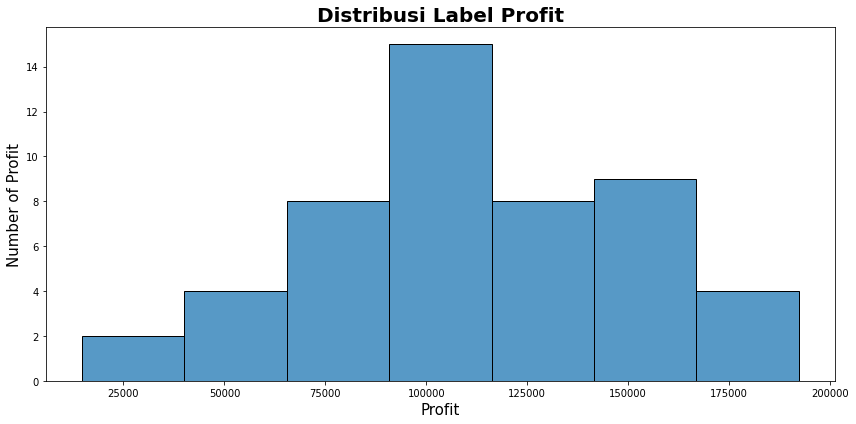

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data=dataset, x="Profit",ax=axs)
axs.set_title("Distribusi Label Profit", fontsize=20, fontweight="bold")
axs.set_xlabel("Profit", fontsize=15)
axs.set_ylabel("Number of Profit", fontsize=15)
plt.tight_layout()
plt.show()

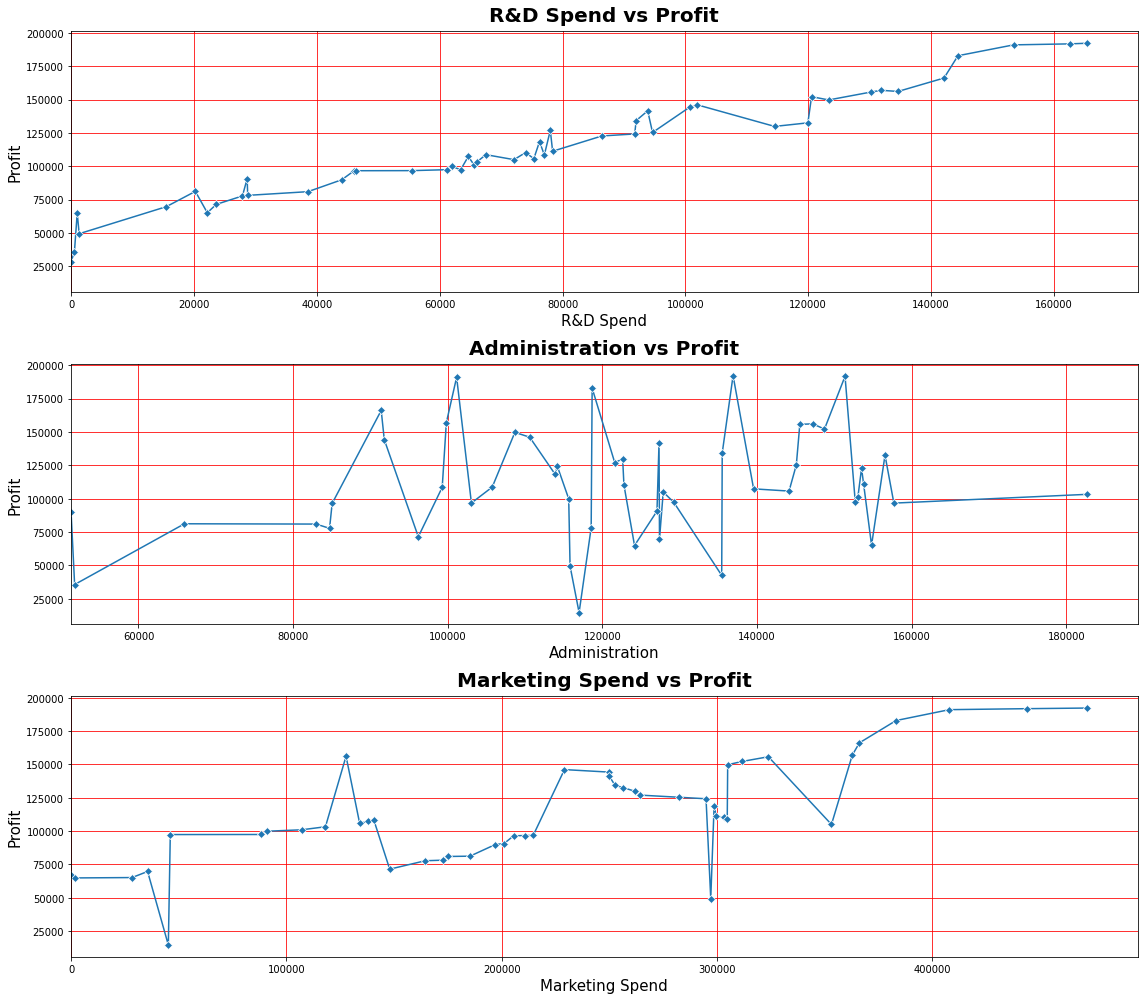

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

float_columns = dataset.columns[dataset.dtypes == "float64"].to_list()
df_float = dataset[float_columns].sort_values(by="Profit")
f_df_float = float_columns.copy()
f_df_float.remove("Profit")

fig, axs = plt.subplots(3, 1, figsize=(16, 14))
for i, kolom in enumerate(f_df_float):
    sns.lineplot(data=df_float, y="Profit", x=kolom, marker="D",ax= axs[i])
    axs[i].set_title("{} vs Profit".format(kolom), fontsize=20, fontweight="bold", pad=10)
    axs[i].set_xlim(df_float[kolom].min())
    axs[i].set_xlabel("{}".format(kolom), fontsize=15)
    axs[i].set_ylabel("Profit", fontsize=15)
    axs[i].grid(color="red")
plt.tight_layout()
plt.show()


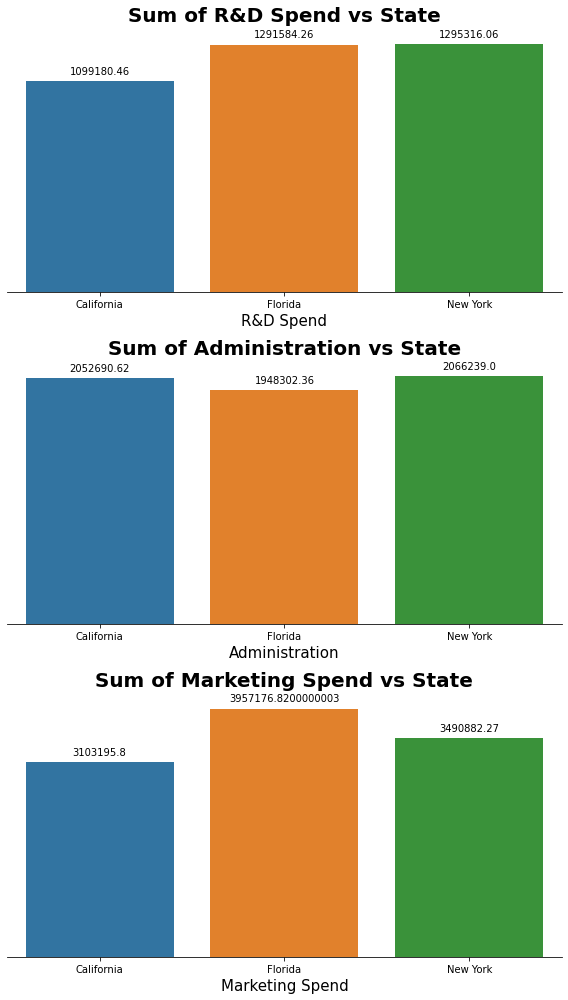

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = dataset.columns[dataset.dtypes == "object"].to_list()

df_object = dataset.groupby([object_columns[0]]).agg({
                                                    "R&D Spend" : "sum",
                                                    "Administration" : "sum",
                                                    "Marketing Spend" : "sum"
                                                   }).reset_index()

fig, axs = plt.subplots(3, 1, figsize=(8, 14))
for i, kolom in enumerate(f_df_float):
    sns.barplot(data=df_object, x="State", y=kolom,ax= axs[i])
    axs[i].set_title("Sum of {} vs State".format(kolom), fontsize=20, fontweight="bold", pad=10)
    axs[i].set_xlabel("{}".format(kolom), fontsize=15)
    axs[i].set_ylabel("Profit", fontsize=15)
    axs[i].axes.yaxis.set_visible(False)
    for p in axs[i].patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()
        axs[i].annotate(
                        height,
                        xy=(x + width/2, height),
                        ha="center",
                        va="center",
                        xytext=(0, 10),
                        textcoords="offset points"
                       )
sns.despine(left=True, top=True, right=True)
plt.tight_layout()
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

X = dataset.drop(["State","Profit"], axis=1)
y = dataset["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Shape of X_train = %d Baris & %d Kolom"%X_train.shape)
print("Shape of y_train = %d Baris"%y_train.shape)
print("Shape of X_test = %d Baris & %d Kolom"%X_test.shape)
print("Shape of y_test = %d Baris"%y_test.shape)

Shape of X_train = 40 Baris & 3 Kolom
Shape of y_train = 40 Baris
Shape of X_test = 10 Baris & 3 Kolom
Shape of y_test = 10 Baris


In [90]:
from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg = model_linreg.fit(X_train, y_train)
y_predict = model_linreg.predict(X_test)

display(y_predict)
display(y_test)

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [91]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

display(mae)
display(mse)
display(rmse)


7320.4416148481305

77506468.16885428

8803.775790469354